In [36]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


plt.style.use("seaborn-white")

df = pd.read_csv("../data/Hitters.csv")
df.head()

C:\Users\Danne\AppData\Local\Temp\ipykernel_29152\3550195283.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [37]:
df = df.dropna()
X = df[['Years', 'Hits']]
y = df['Salary']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
DT_tree = DecisionTreeRegressor(random_state=42, max_depth=2)
DT_tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=2, random_state=42)

c:\Users\Danne\.virtualenvs\Machine-learning-PT8MuEHh\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


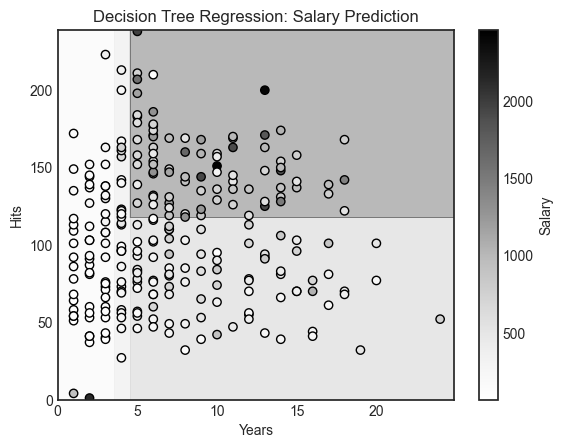

In [39]:
# Create a meshgrid for the plot
x1_min, x1_max = X['Years'].min() - 1, X['Years'].max() + 1
x2_min, x2_max = X['Hits'].min() - 1, X['Hits'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

# Predict the salary based on the meshgrid
Z = DT_tree.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

# Plot the contour and scatter plot
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X['Years'], X['Hits'], c=y, edgecolors='k')
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Decision Tree Regression: Salary Prediction')
plt.colorbar(label='Salary')
plt.show()


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree._splitter import Splitter

class CustomSplitDecisionTreeRegressor(DecisionTreeRegressor):
    def __init__(self, fixed_splits=None, **kwargs):
        super().__init__(**kwargs)
        self.fixed_splits = fixed_splits or {}

    def _get_splitter(self, splitter):
        return CustomSplitter(self.fixed_splits)

class CustomSplitter(Splitter):
    def __init__(self, fixed_splits):
        self.fixed_splits = fixed_splits

    def node_split(self, *args, **kwargs):
        if self.fixed_splits:
            feature, threshold = self.fixed_splits.popitem()
            return feature, threshold
        else:
            return super().node_split(*args, **kwargs)


In [41]:
DT_tree = CustomSplitDecisionTreeRegressor(fixed_splits={0: 5, 1: 100}, max_depth=2, random_state=42)
DT_tree.fit(X_train, y_train)


CustomSplitDecisionTreeRegressor(fixed_splits={0: 5, 1: 100})

c:\Users\Danne\.virtualenvs\Machine-learning-PT8MuEHh\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but CustomSplitDecisionTreeRegressor was fitted with feature names
  warnings.warn(


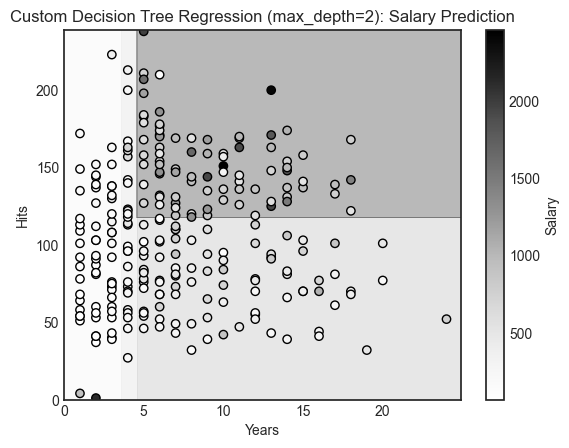

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree


df = df.dropna()
X = df[['Years', 'Hits']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT_tree = CustomSplitDecisionTreeRegressor(fixed_splits={0: 5, 1: 100}, max_depth=2, random_state=42)
DT_tree.fit(X_train, y_train)

x1_min, x1_max = X['Years'].min() - 1, X['Years'].max() + 1
x2_min, x2_max = X['Hits'].min() - 1, X['Hits'].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))

Z = DT_tree.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X['Years'], X['Hits'], c=y, edgecolors='k')
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Custom Decision Tree Regression (max_depth=2): Salary Prediction')
plt.colorbar(label='Salary')
plt.show()


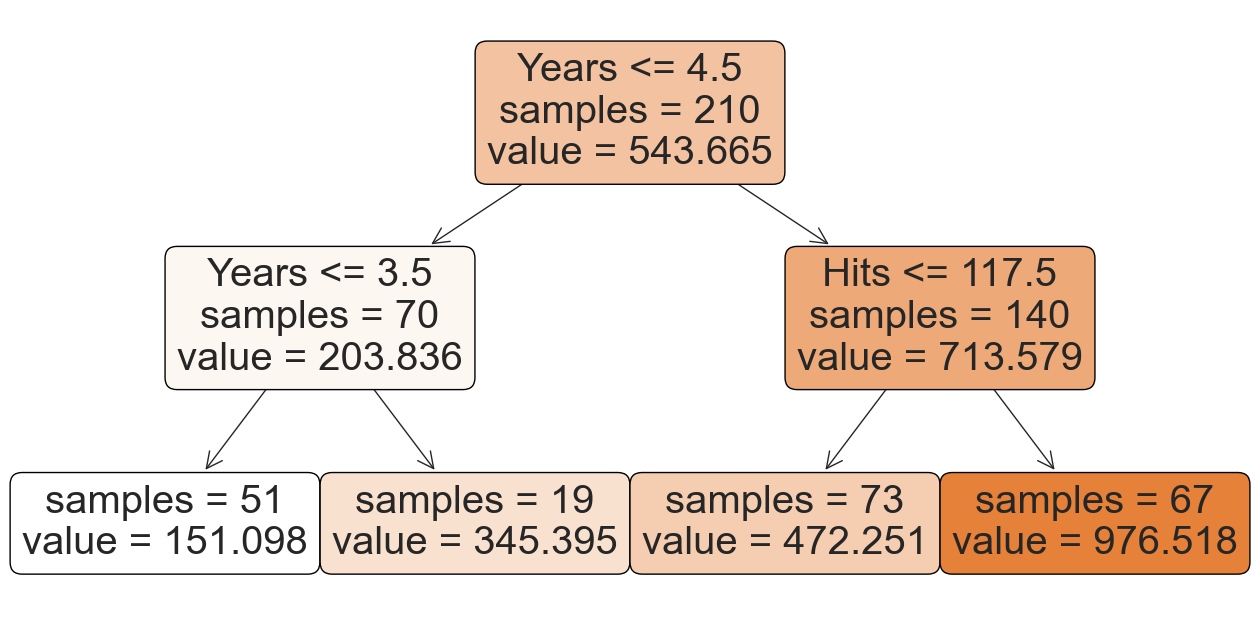

In [44]:
fig, ax = plt.figure(figsize=(16,8), dpi=100), plt.axes()
tree.plot_tree(DT_tree, filled=True, ax=ax, feature_names=list(X.columns), impurity=False, rounded=True);